### Training LSTM model

The following code is designed to train 32 different models by combination of different pre-processing methods. The order of the below processes reflects the order of the preprocessing methods.
<list>
- Expansion of contractions
- Basic preprocessing
- Grammar correction
- Simplification of negations
- Lemmatization
- Removal of stop words

In [ ]:
import imports as ii
import functions as f
import preprocessing as pp
import neuralnetworks as nn
import trainRNN as trainRNN

In [4]:
PATH = {}
PATH["dataset_classification"] = "dataset/classification/"
PATH["dataset_labeling"] = "dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test.json.gz"
train = f.readJson(PATH["music_reviews_train"])
test = f.readJson(PATH["music_reviews_dev"])

Number of data:  100000
Number of data:  10000


In [20]:
X_train, y_train, train_idx, train_missing_idx = f.json_divide(train)
X_test, y_test, test_idx, test_missing_idx = f.json_divide(test)

# convert labels
sent_dict = {"positive": 1, "negative": 0}
y_train = pp.sentiment_converter(y_train, sent_dict)
y_test = pp.sentiment_converter(y_test, sent_dict)

##############################################################
leng = 5000 # train set size (how many samples are used for training)
start = 6666
maxlen = 50 # length of sentences

##############################################################
X_train = X_train[start:start+leng]
y_train = y_train[start:start+leng]
#X_test = X_test[start:start+leng]
#y_test = y_test[start:start+leng]

# Grid search & Training

# Below line is running for a while

In [ ]:
data_sets, y_train, y_test = f.grid_search(X_train, X_test, y_train, y_test)

In [ ]:
# ii.reload(f)
# to be merged into the training, now seperated
# basic statistics about the sets
f.statistics_sets_sizes(data_sets, max_len=maxlen)

In [ ]:
trainRNN.trainRNN(data_sets, y_train, y_test, early_stop_patience=2, filename="dummy", maxlen=maxlen)

In [60]:
# For retraining

In [65]:
p3 = [1,1,1,1,0,1]
#p3 = [0,1,0,0,0,1]
p3 = [0,1,1,0,0,1]

data_sets, y_train, y_test = f.grid_search_retrain(X_train, X_test, y_train, y_test, p3)

Combinations:  [0, 1, 1, 0, 0, 1]
Epoch 1/10
200/200 [==============================] - 34s 95ms/step - loss: 0.8153 - accuracy: 0.6858 - val_loss: 0.5098 - val_accuracy: 0.7986 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.2705 - accuracy: 0.9062
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
200/200 [==============================] - 20s 100ms/step - loss: 0.2705 - accuracy: 0.9062 - val_loss: 0.5389 - val_accuracy: 0.8232 - lr: 0.0010
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.1684 - accuracy: 0.9582
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
200/200 [==============================] - 20s 98ms/step - loss: 0.1684 - accuracy: 0.9582 - val_loss: 0.7030 - val_accuracy: 0.8198 - lr: 2.0000e-04
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9684
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762

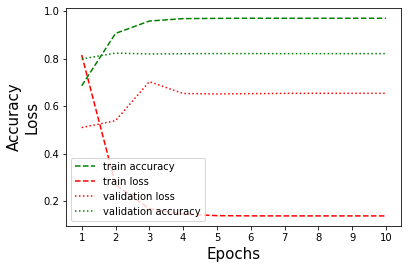

Combinations were checked


In [66]:
trainRNN.trainRNN(data_sets, y_train, y_test, early_stop_patience=10, filename="5000_retrain_new_stop_words")